In [1]:
pip install nes-py gym_super_mario_bros


  Using cached nes_py-8.2.1-cp311-cp311-win_amd64.whl
  Using cached gym_super_mario_bros-7.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached gym-0.26.2-py3-none-any.whl
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 259.2 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 406.4 kB/s eta 0:00:00
  Using cached pyglet-1.5.21-py3-none-any.whl (1.1 MB)
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
Using cached gym_super_mario_bros-7.4.0-py3-none-any.whl (199 kB)
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
    --------------------------------------- 0.4/15.8 MB 7.6 MB/s eta 0:00:03
   ---- -------------------------

In [2]:
# install pytorch
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 8.5 MB/s eta 0:05:19
     ---------------------------------------- 0.0/2.7 GB 22.7 MB/s eta 0:02:00
     ---------------------------------------- 0.0/2.7 GB 46.6 MB/s eta 0:00:58
     ---------------------------------------- 0.0/2.7 GB 93.0 MB/s eta 0:00:29
     ---------------------------------------- 0.0/2.7 GB 108.8 MB/s eta 0:00:25
     ---------------------------------------- 0.0/2.7 GB 108.8 MB/s eta 0:00:25
     ---------------------------------------- 0.0/2.7 GB 131.2 MB/s eta 0:00:21
     ---------------------------------------- 0.0/2.7 GB 110.0 MB/s eta 0:00:25
      --------------------------------------- 0.0/2.7 GB 129.5 MB/s eta 0:00:21
      --------------------------------------- 0.0/2.7 GB 131.2 MB/s eta 0:00:21
      --------------------------------------- 0.0/2.7 GB 131.2 MB/s eta 0:0

In [3]:
#stablebaselines for modeling RL 
!pip install stable-baselines3[extra]

  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached AutoROM.accept_rom_license-0.6.1-py3-none-any.whl
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     -------------------------------------- 162.3/162.3 kB 4.8 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
Using cached AutoROM-0.6.1-py3-none-any.whl (9.4 kB)
Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.6/5.5 MB 20.1 MB/s eta 0:00:01
   ------------------------------ --------- 4.1/5.5 MB 52.9 MB/s eta 0:00:01
   ---------------------------------------- 5.5/5.5 MB 50.3 MB/s eta 0:00:00
   ---------------------------------------- 

In [1]:
        #Import the game
import gym_super_mario_bros
        #Joypad Wrapper?
from nes_py.wrappers import JoypadSpace
        #Simplified Controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
# Import frame stacker wrapper and grayscaling wrapper
# Framestack ltierally stacks frames, giving a ghost for the ai to train off of, allowing to visualize movement and location
from gym.wrappers import FrameStack, GrayScaleObservation
# IMport Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib
from matplotlib import pyplot as plt
# Import Glob
import glob

In [4]:
JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)
# create base env
env = gym_super_mario_bros.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode='human')
# simplify the controls from 256 NES controls to 7 norm/20 hard
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# greyscale the screen for easier reading by the ai
env = GrayScaleObservation(env, keep_dim=True)
# wrap inside the dummy env
env = DummyVecEnv([lambda: env])
# stack the frames
env = VecFrameStack(env, 4, channels_order='last')
#stack the frames

C:\Users\danie\anaconda3\envs\MarioTakeTwo\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
C:\Users\danie\anaconda3\envs\MarioTakeTwo\Lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(
C:\Users\danie\anaconda3\envs\MarioTakeTwo\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [14]:
# This is the initial game loop- Ignore

# Create a flag - restart or no
# Done variable controls if the game step will end or not
# Every action move sthe game 1 step forward once done is true
# If the done = True, reset the env to the next frame, return all the states of the current frame, then render that frame. 
# .reset() INITIATES THE GAME!!!!! BIG KNOWLEDGE
# state also returns all the specified information
'''done = True
# loop each frame
for step in range(100000):
    if done:
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    #done = terminated or truncated
    env.render()
env.close()
'''
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100000): 
    # Start the game to begin with 
    if done: 
        # Start the gamee
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()


IndexError: invalid index to scalar variable.

In [44]:
state = env.reset()

In [4]:
env.reset()

array([[[[  0,   0,   0, 140],
         [  0,   0,   0, 140],
         [  0,   0,   0, 140],
         ...,
         [  0,   0,   0, 140],
         [  0,   0,   0, 140],
         [  0,   0,   0, 140]],

        [[  0,   0,   0, 140],
         [  0,   0,   0, 140],
         [  0,   0,   0, 140],
         ...,
         [  0,   0,   0, 140],
         [  0,   0,   0, 140],
         [  0,   0,   0, 140]],

        [[  0,   0,   0, 140],
         [  0,   0,   0, 140],
         [  0,   0,   0, 140],
         ...,
         [  0,   0,   0, 140],
         [  0,   0,   0, 140],
         [  0,   0,   0, 140]],

        ...,

        [[  0,   0,   0, 214],
         [  0,   0,   0, 124],
         [  0,   0,   0, 124],
         ...,
         [  0,   0,   0, 124],
         [  0,   0,   0, 124],
         [  0,   0,   0,   0]],

        [[  0,   0,   0, 214],
         [  0,   0,   0, 124],
         [  0,   0,   0, 124],
         ...,
         [  0,   0,   0, 124],
         [  0,   0,   0,   0],
         

In [18]:
state.shape

(1, 240, 256, 4)

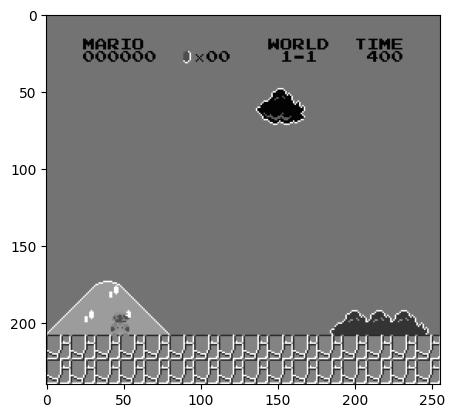

In [23]:
#use matplotlib to show game frame by plotting the rgb
plt.imshow(state[0])

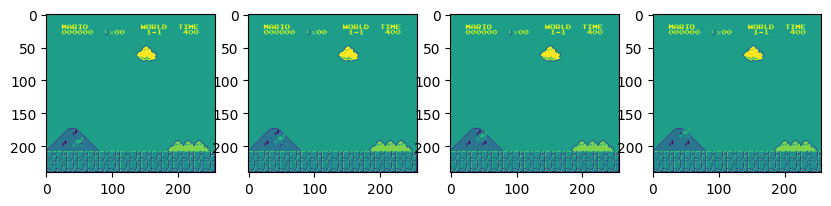

In [55]:
plt.figure(figsize=(10,8))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model


In [5]:
 # IMport OS for file path management
import os
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base callback for saving models
from stable_baselines3.common.callbacks import BaseCallback
# Import Time package for timestamps
import time

In [6]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq ==0:
            timestamp = time.strftime("%Y%m%d%H%M%S")
            model_path = os.path.join(self.save_path, 'gen_two_best_model_{}_{}'.format(self.n_calls, timestamp))
            self.model.save(model_path)
        return True

In [7]:
CHECKPOINT_DIR = 'F:/Reinforcement_Learning/Mario.ai/train/'
LOG_DIR = './logs'

In [19]:
callback = TrainAndLoggingCallback(check_freq=50000, save_path=CHECKPOINT_DIR)


In [8]:
# this is the ai model 
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [9]:
# train AI model finally , this is where we do the learn maneuver 
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs\PPO_6


C:\Users\danie\anaconda3\envs\MarioTakeTwo\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


----------------------------
| time/              |     |
|    fps             | 92  |
|    iterations      | 1   |
|    time_elapsed    | 5   |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 82           |
|    iterations           | 2            |
|    time_elapsed         | 12           |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 2.596178e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | 0.00297      |
|    learning_rate        | 1e-06        |
|    loss                 | 199          |
|    n_updates            | 10           |
|    policy_gradient_loss | 2.07e-05     |
|    value_loss           | 462          |
------------------------------------------
-----------------------

In [10]:
model.save('thisisatestmodel')

In [26]:
model = PPO.load('F:/Reinforcement_Learning/Mario.ai/train/best_model_100000')

In [30]:
model = PPO.load('F:/Reinforcement_Learning/Mario.ai/train/best_model_500000')

In [13]:
model = PPO.load('F:/Reinforcement_Learning/Mario.ai/train/best_model_1000000')

In [22]:
state = env.reset()

In [14]:
env.close()

In [25]:
state = env.reset()
while True:
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

C:\Users\danie\anaconda3\envs\MarioTakeTwo\Lib\site-packages\gym\utils\passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(


KeyboardInterrupt: 

In [24]:
model = PPO.load('F:/Reinforcement_Learning/Mario.ai/train/gen_two_best_model_3250000_20240226130314')

In [20]:
model.set_env(env)
model.learn(total_timesteps=10000000, callback=callback)

Wrapping the env in a VecTransposeImage.
Logging to ./logs\PPO_12
----------------------------
| time/              |     |
|    fps             | 165 |
|    iterations      | 1   |
|    time_elapsed    | 3   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 104           |
|    iterations           | 2             |
|    time_elapsed         | 9             |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 0.00041259744 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.317        |
|    explained_variance   | 0.863         |
|    learning_rate        | 1e-06         |
|    loss                 | 54.7          |
|    n_updates            | 21320         |
|    policy_gradient_loss | -0.000741     |
|    value_loss           |

KeyboardInterrupt: 